In [1]:
import csv
import time

import numpy as np
import matplotlib.pyplot as plt


def extractData(filename, verbose=False):
    """ Reads data from csv file and returns it in array form.
    """
    lst=[]
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            lst.append(row)
    data=np.array(lst, dtype=float)
    if verbose:
        print(filename, 'loaded')
    return data

In [5]:
headers=["ID", "m1_inj" , "m2_inj", "chi1_inj", "chi2_inj", "mc_inj", "q_inj", "R_isco_inj", "Compactness_inj", "m1_rec", "m2_rec", "chi1_rec", "chi2_rec", "mc_rec", "frac_mc_err", "q_rec", "R_isco_rec", "Compactness_rec", "snr", "label"]
headpred=["m1","chi1","chi2","Mc"]
index_inj=[1,3,4,5]
index_rec=[9,11,12,13]

In [9]:
#load data
test_data=extractData(path+'test_NS.csv')
NN_pred=extractData(path+'cNN_prediction.csv')

In [11]:
inj=test_data[:,index_eq];
rec=test_data[:,index_rec];
pred=NN_pred;

## Relative error for mass1 and Mc, difference for spins

In [18]:
error_rec_m=((rec[:,[0,3]]-inj[:,[0,3]])/inj[:,[0,3]]);
error_rec_s=((rec-inj))[:,[1,2]];
error_pred_m=((pred[:,[0,3]]-inj[:,[0,3]])/inj[:,[0,3]])
error_pred_s=((pred-inj))[:,[1,2]];

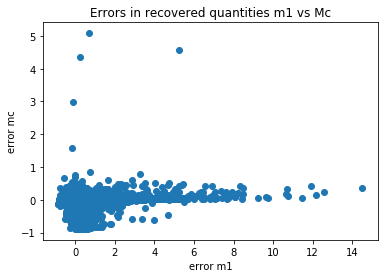

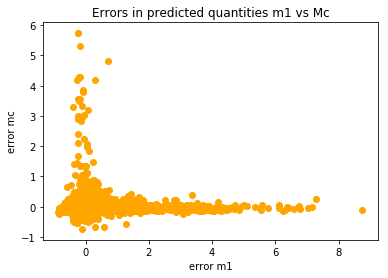

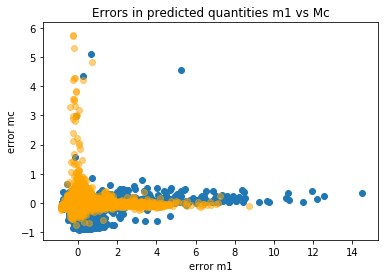

In [34]:
plt.scatter(error_rec_m[:,0],error_rec_m[:,1])
plt.xlabel("error m1"); plt.ylabel("error mc"); plt.title ("Errors in recovered quantities m1 vs Mc")
plt.show()
plt.scatter(error_pred_m[:,0],error_pred_m[:,1], c='orange')
plt.xlabel("error m1"); plt.ylabel("error mc"); plt.title ("Errors in predicted quantities m1 vs Mc")
plt.show()
plt.xlabel("error m1"); plt.ylabel("error mc"); plt.title ("Errors in predicted quantities m1 vs Mc")
plt.scatter(error_rec_m[:,0],error_rec_m[:,1])
plt.scatter(error_pred_m[:,0],error_pred_m[:,1], c='orange',alpha=0.5)
plt.show()

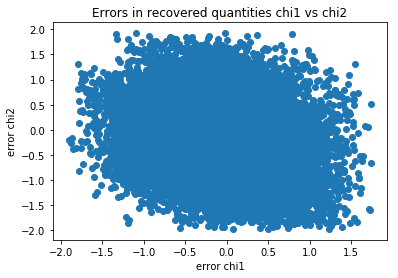

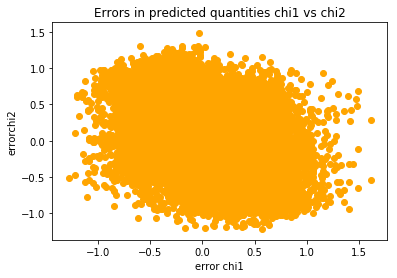

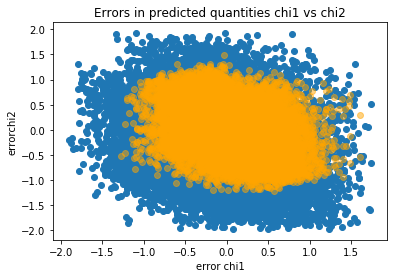

In [36]:
plt.scatter(error_rec_s[:,0],error_rec_s[:,1])
plt.xlabel("error chi1"); plt.ylabel("error chi2"); plt.title ("Errors in recovered quantities chi1 vs chi2")
plt.show()
plt.scatter(error_pred_s[:,0],error_pred_s[:,1], c='orange')
plt.xlabel("error chi1"); plt.ylabel("errorchi2"); plt.title ("Errors in predicted quantities chi1 vs chi2")
plt.show()
plt.scatter(error_rec_s[:,0],error_rec_s[:,1])
plt.scatter(error_pred_s[:,0],error_pred_s[:,1], c='orange',alpha=0.5)
plt.xlabel("error chi1"); plt.ylabel("errorchi2"); plt.title ("Errors in predicted quantities chi1 vs chi2")
plt.show()

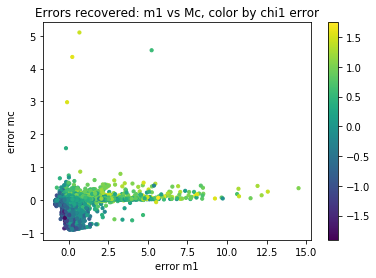

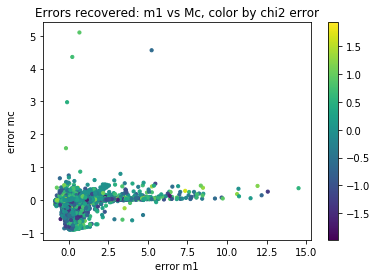

In [32]:
plt.scatter(error_rec_m[:,0],error_rec_m[:,1],c=error_rec_s[:,0],s=10)
plt.xlabel("error m1"); plt.ylabel("error mc"); plt.title ("Errors recovered: m1 vs Mc, color by chi1 error")
plt.colorbar()
plt.show()
plt.scatter(error_rec_m[:,0],error_rec_m[:,1],c=error_rec_s[:,1],s=10)
plt.xlabel("error m1"); plt.ylabel("error mc"); plt.title ("Errors recovered: m1 vs Mc, color by chi2 error")
plt.colorbar()
plt.show()

## Histograms

In [ ]:
qtrain=ytrain[:,1]/ytrain[:,0]
qvalid=yvalid[:,1]/yvalid[:,0]
qtest=ytest_notnormalized[:,1]/ytest_notnormalized[:,0]

fig, axs = plt.subplots(1,3, figsize=(11, 3))
axs[0].hist(ytrain[:,0],bins=np.arange(1.2,1.9,0.1), alpha=1, label='train')
axs[0].hist(ytest_notnormalized[:,0],bins=np.arange(1.2,1.9,0.1), alpha=1, label='test')
axs[0].hist(yvalid[:,0],bins=np.arange(1.2,1.9,0.1), alpha=1, label='validate')
axs[0].set_xlabel('m1')
axs[0].axvline(x=1.5, color='r', linestyle='dashed', linewidth=2)
axs[0].axvline(x=1.75, color='r', linestyle='dashed', linewidth=2)
axs[1].hist(ytrain[:,1],bins=np.arange(1.0,1.7,0.1), alpha=1, label='train')
axs[1].hist(ytest_notnormalized[:,1],bins=np.arange(1.0,1.7,0.1), alpha=1, label='test')
axs[1].hist(yvalid[:,1],bins=np.arange(1.0,1.7,0.1), alpha=1, label='validate')
axs[1].set_xlabel('m2')
axs[1].axvline(x=1.15, color='r', linestyle='dashed', linewidth=2)
axs[1].axvline(x=1.45, color='r', linestyle='dashed', linewidth=2)
axs[2].hist(qtrain,bins=np.arange(0.6,1.1,0.1), alpha=1, label='train')
axs[2].hist(qtest,bins=np.arange(0.6,1.1,0.1), alpha=1, label='test')
axs[2].hist(qvalid,bins=np.arange(0.6,1.1,0.1), alpha=1, label='validate')
axs[2].set_xlabel('q')
axs[2].axvline(x=0.9, color='r', linestyle='dashed', linewidth=2)
plt.subplots_adjust(wspace=0.4)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig('hists_data.png', dpi=300,bbox_inches='tight')


In [ ]:
pqt = sum(1 for i in qtrain if i>0.9);pqv = sum(1 for i in qvalid if i>0.9);pqte = sum(1 for i in qtest if i>0.9)
print("% q>0.9 in training", pqt/len(qtrain))
print("% q>0.9 in validation", pqv/len(qvalid))
print("% q>0.9 in testing", pqte/len(qtest))

pmt = sum(1 for i in ytrain[:,0] if (i<1.5 or i>1.75));pmv = sum(1 for i in yvalid[:,0] if (i<1.5 or i>1.75));
pmte = sum(1 for i in ytest_notnormalized[:,0] if (i<1.5 or i>1.75))
print("% m1 out in training", pmt/len(qtrain))
print("% m1 out in validation", pmv/len(qvalid))
print("% m1 out in testing", pmte/len(qtest))

## Error in recovered - rainbows

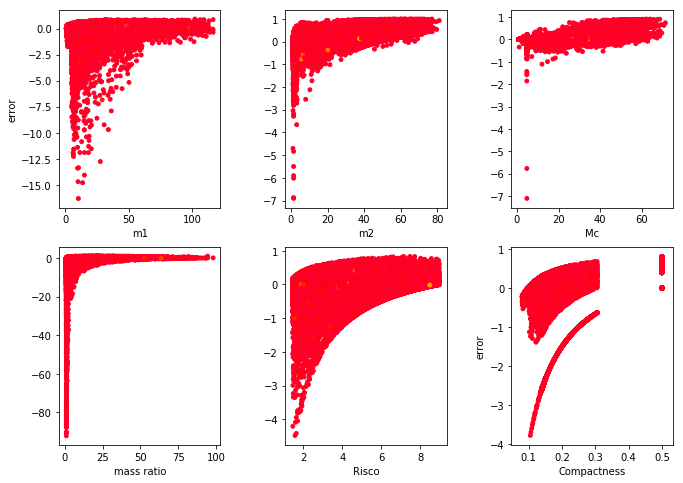

In [4]:
#Variables considered for regression
#m1
m1_inj = train_all[:,i_m1i]
m1_rec = train_all[:,i_m1r]
errorm1 = (m1_inj-m1_rec)/m1_inj

#m2
m2_inj = train_all[:,i_m2i]
m2_rec = train_all[:,i_m2r]
errorm2 = (m2_inj-m2_rec)/m2_inj

#Mc
Mc_inj = train_all[:,i_mci]
Mc_rec = train_all[:,i_mcr]
errorMc = (Mc_inj-Mc_rec)/Mc_inj

#Mass ratio
q_inj = train_all[:,i_qi]
q_rec = train_all[:,i_qr]
errorq = (q_inj-q_rec)/q_inj

#Spin 1
#x1_inj = train_all[:,i_x1i]
#x1_rec = train_all[:,i_x1r]
#errorx1 = (x1_inj-x1_rec)/zerothen1(x1_inj)

#Spin 2
#x2_inj = train_all[:,i_x2i]
#x2_rec = train_all[:,i_x2r]
#errorx2 = (x2_inj-x2_rec)/zerothen1(x2_inj)

#Risco
R_inj = train_all[:,i_Ri]
R_rec = train_all[:,i_Rr]
errorR = (R_inj-R_rec)/R_inj

#Compactness
C_inj = train_all[:,i_Ci]
C_rec = train_all[:,i_Cr]
errorC = (C_inj-C_rec)/C_inj

snr=train_all[:,i_snr]

labels = ['m1', 'm2', 'Mc', 'mass ratio', 'Risco', 'Compactness']# 'x1', 'x2',

injected = [m1_inj, m2_inj, Mc_inj, q_inj, R_inj, C_inj]#, x1_inj, x2_inj,
error = [errorm1, errorm2, errorMc, errorq, errorR, errorC]#, errorx1, errorx2


fig, ax = plt.subplots(2,3, figsize=(11, 8))
ax = ax.ravel()
for i in range(0,len(labels)):
    ax[i].scatter(injected[i],error[i], c=snr, s=15, cmap="gist_rainbow")
    ax[i].set_xlabel(labels[i])
ax[0].set_ylabel('error')
ax[5].set_ylabel('error')
plt.subplots_adjust(wspace=0.4)
#plt.savefig(path+'error_in_train.png',dpi=200,bbox_inches='tight')
plt.show()

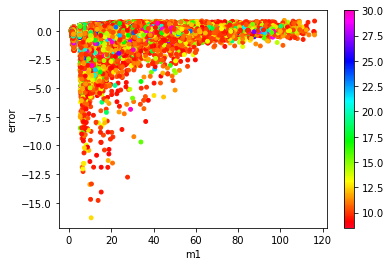

In [16]:
i=0
sc=plt.scatter(injected[i],error[i], c=snr, s=15, cmap="gist_rainbow", vmin=8.5, vmax=30)
plt.colorbar(sc)
plt.ylabel('error')
plt.xlabel('m1')
plt.savefig(path+'example_snr.png',dpi=200,bbox_inches='tight')
plt.show()

In [7]:
np.min(snr)

8.517329

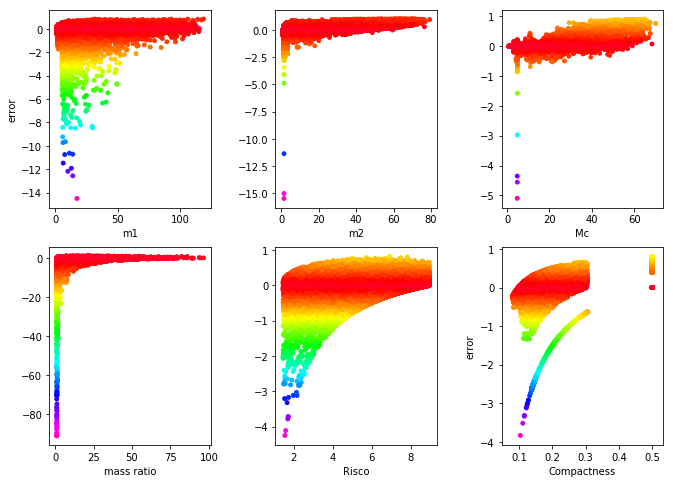

In [30]:
#Variables considered for regression
#m1
m1_inj = test_all[:,i_m1i]
m1_rec = test_all[:,i_m1r]
errorm1 = (m1_inj-m1_rec)/m1_inj

#m2
m2_inj = test_all[:,i_m2i]
m2_rec = test_all[:,i_m2r]
errorm2 = (m2_inj-m2_rec)/m2_inj

#Mc
Mc_inj = test_all[:,i_mci]
Mc_rec = test_all[:,i_mcr]
errorMc = (Mc_inj-Mc_rec)/Mc_inj

#Mass ratio
q_inj = test_all[:,i_qi]
q_rec = test_all[:,i_qr]
errorq = (q_inj-q_rec)/q_inj

#Spin 1
#x1_inj = train_all[:,i_x1i]
#x1_rec = train_all[:,i_x1r]
#errorx1 = (x1_inj-x1_rec)/zerothen1(x1_inj)

#Spin 2
#x2_inj = train_all[:,i_x2i]
#x2_rec = train_all[:,i_x2r]
#errorx2 = (x2_inj-x2_rec)/zerothen1(x2_inj)

#Risco
R_inj = test_all[:,i_Ri]
R_rec = test_all[:,i_Rr]
errorR = (R_inj-R_rec)/R_inj

#Compactness
C_inj = test_all[:,i_Ci]
C_rec = test_all[:,i_Cr]
errorC = (C_inj-C_rec)/C_inj

labels = ['m1', 'm2', 'Mc', 'mass ratio', 'Risco', 'Compactness']# 'x1', 'x2',

injected = [m1_inj, m2_inj, Mc_inj, q_inj, R_inj, C_inj]#, x1_inj, x2_inj,
error = [errorm1, errorm2, errorMc, errorq, errorR, errorC]#, errorx1, errorx2


fig, ax = plt.subplots(2,3, figsize=(11, 8))
ax = ax.ravel()
for i in range(0,len(labels)):
    ax[i].scatter(injected[i],error[i], c=np.abs(error[i]), s=15, cmap="gist_rainbow")
    ax[i].set_xlabel(labels[i])
ax[0].set_ylabel('error')
ax[5].set_ylabel('error')
plt.subplots_adjust(wspace=0.4)
plt.savefig(path+'error_in_test.png',dpi=200,bbox_inches='tight')
plt.show()

# Label by color

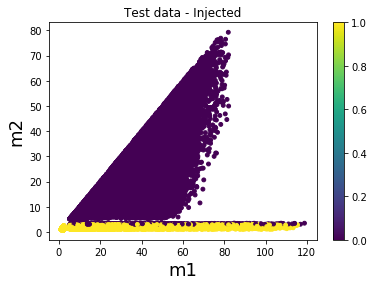

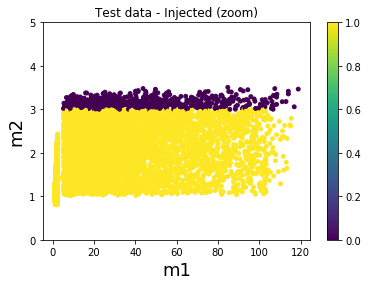

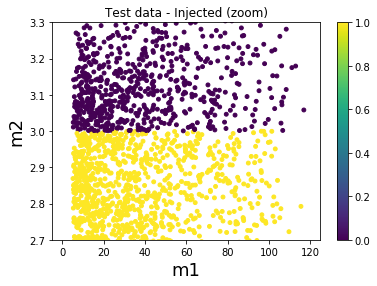

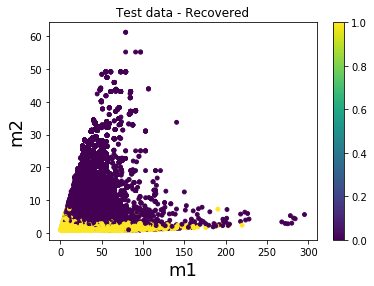

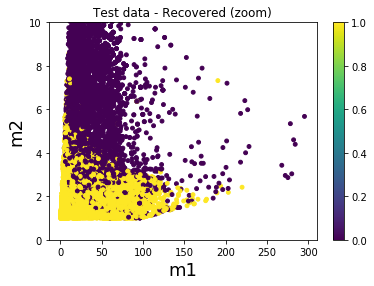

In [28]:
m1_inj = test_all[:,i_m1i]
m2_inj = test_all[:,i_m2i]
m1_rec = test_all[:,i_m1r]
m2_rec = test_all[:,i_m2r]
prob_being_1 = test_all[:,-1]

sc=plt.scatter(m1_inj, m2_inj, c= prob_being_1, vmin=0, vmax=1, s=15, cmap='viridis')
plt.colorbar(sc)
plt.xlabel('m1', fontsize=18)
plt.ylabel('m2', fontsize=18)
plt.title('Test data - Injected')
plt.savefig(path+'label_injected.png',dpi=200,bbox_inches='tight')

plt.show()
plt.clf()

sc=plt.scatter(m1_inj, m2_inj, c= prob_being_1, vmin=0, vmax=1, s=15, cmap='viridis')
plt.colorbar(sc)
plt.xlabel('m1', fontsize=18)
plt.ylabel('m2', fontsize=18)
plt.title('Test data - Injected (zoom)')
plt.ylim(0,5)
plt.savefig(path+'label_injected_1.png',dpi=200,bbox_inches='tight')

plt.show()
plt.clf()

sc=plt.scatter(m1_inj, m2_inj, c= prob_being_1, vmin=0, vmax=1, s=15, cmap='viridis')
plt.colorbar(sc)
plt.xlabel('m1', fontsize=18)
plt.ylabel('m2', fontsize=18)
plt.title('Test data - Injected (zoom)')
plt.ylim(2.7,3.3)
plt.savefig(path+'label_injected_2.png',dpi=200,bbox_inches='tight')

plt.show()
plt.clf()

sc=plt.scatter(m1_rec, m2_rec, c= prob_being_1, vmin=0, vmax=1, s=15, cmap='viridis')
plt.colorbar(sc)
plt.xlabel('m1', fontsize=18)
plt.ylabel('m2', fontsize=18)
plt.title('Test data - Recovered')
plt.savefig(path+'label_recovered.png',dpi=200,bbox_inches='tight')

plt.show()
plt.clf()

sc=plt.scatter(m1_rec, m2_rec, c= prob_being_1, vmin=0, vmax=1, s=15, cmap='viridis')
plt.colorbar(sc)
plt.xlabel('m1', fontsize=18)
plt.ylabel('m2', fontsize=18)
plt.ylim(0,10)
plt.title('Test data - Recovered (zoom)')
plt.savefig(path+'label_recovered_1.png',dpi=200,bbox_inches='tight')

plt.show()

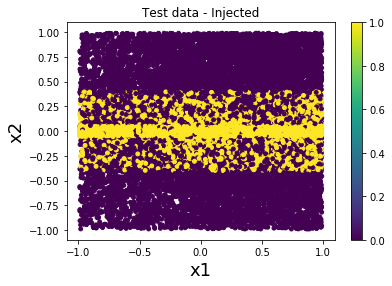

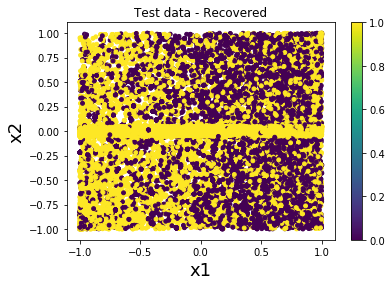

<Figure size 432x288 with 0 Axes>

In [5]:
x1_inj = test_all[:,i_x1i]
x2_inj = test_all[:,i_x2i]
x1_rec = test_all[:,i_x1r]
x2_rec = test_all[:,i_x2r]
prob_being_1 = test_all[:,-1]

sc=plt.scatter(x1_inj, x2_inj, c= prob_being_1, vmin=0, vmax=1, s=15, cmap='viridis')
plt.colorbar(sc)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
plt.title('Test data - Injected')
plt.savefig(path+'label_xinjected.png',dpi=200,bbox_inches='tight')

plt.show()
plt.clf()

sc=plt.scatter(x1_rec, x2_rec, c= prob_being_1, vmin=0, vmax=1, s=15, cmap='viridis')
plt.colorbar(sc)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
plt.title('Test data - Recovered')
plt.savefig(path+'label_xrecovered.png',dpi=200,bbox_inches='tight')

plt.show()
plt.clf()